<h1>CS210 Project - File 3</h1>
Perform statistical analysis & machine learning on the data
<hr />
We have built the data frame we have been looking for, now we will perform various analysis operations on it

In [8]:
# Import the necessary libraries
import sklearn
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import statsmodels
from scipy.stats import pearsonr, betai
import matplotlib.pyplot as plt
from math import sqrt
import scipy.stats as sp

%matplotlib inline

In [9]:
pickleData = pd.read_pickle('pickles/finalDF_incident.pickle')

In [10]:
pickleData

,Town,SBcount,Population,EMScount,FireCount,TrafficCount,TotalCalls
0,Bala-Cynwyd,7,9619,1109,473,1430,3012
1,King of Prussia,6,19936,2155,527,1193,3875
2,Montgomeryville,5,12624,1845,445,1741,4031
3,Rockledge,3,24998,2468,736,1955,5159
4,Willow Grove,3,15726,3209,794,2229,6232
5,Plymouth Meeting,3,6177,1668,550,1293,3511
6,Wyncote,2,3044,1054,369,803,2226
7,Flourtown,2,4538,1264,481,1093,2838
8,Pottstown,2,22392,1550,368,1525,3443
9,Bridgeport,2,4558,1336,378,1372,3086


It is very important to normalize our data to the population of the area!

In [11]:
df = pd.DataFrame()
df['storePerPerson'] = pickleData.apply(lambda row: row['SBcount'] / row['Population'], axis=1)
df['callPerPerson'] = pickleData.apply(lambda row: row['TotalCalls'] / row['Population'], axis=1)
df['firePerPerson'] = pickleData.apply(lambda row: row['FireCount'] / row['Population'], axis=1)
df['emsPerPerson'] = pickleData.apply(lambda row: row['EMScount'] / row['Population'], axis=1)
df['trafficPerPerson'] = pickleData.apply(lambda row: row['TrafficCount'] / row['Population'], axis=1)

In [12]:
df.head(3)

,storePerPerson,callPerPerson,firePerPerson,emsPerPerson,trafficPerPerson
0,0.000728,0.313130,0.049174,0.115293,0.148664
1,0.000301,0.194372,0.026435,0.108096,0.059841
2,0.000396,0.319312,0.035250,0.146150,0.137912


<h2>Hypothesis Testing</h2>

We believe that the areas populated with more Starbucks stores per person are object to more 911 calls per person. Hence our <b>null hypothesis</b> is as follows:<br />
<b>H<sub>0</sub>:</b> The number of 911 calls originating from areas having more Starbucks stores is larger than areas having fewer stores<br /><br />

And if it is necessary to state, our alternative hypothesis is the following composite hypothesis:<br />
<b>H<sub>1</sub>:</b> The number o 911 calls originating from areas having more Starbucks stores is <b>not</b> larger than the areas having fewer stores<br /><br />
Hence we claim that there exists a positive correlation between the two. In order to statistically prove this statement, we shall analyse the correlation values between pairs and see if the numbers are statistically significant by looking at the p-values

In [13]:
pearsonR = df.corr(method="pearson")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

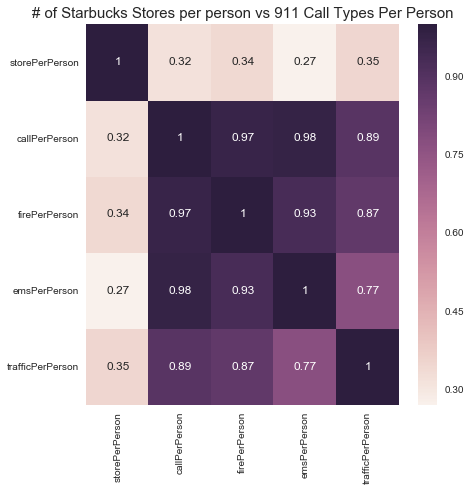

In [14]:
import seaborn as sns
title = '# of Starbucks Stores per person vs 911 Call Types Per Person'
fig = plt.figure(figsize=(7,7))
plt.title(title, size=15)
sns.heatmap(pearsonR,annot=True, annot_kws={"size":12});
plt.yticks(rotation="horizontal")
plt.xticks(rotation="vertical")

The inner purple part is where the categories of 911 calls are related to each other. They seem to be very strongly correlated and that is no surprise because they are <b>dependent</b> random variables. What's interesting is that the number of Starbucks stores per person seems to correlate positively with types of 911 calls per person, especially witht the traffic related calls.
<br /><br />
However, we have only performed the Pearson's R correlation (which looks for linear relationships only) yet. We shall perform two more tests:
<ol>
    <li><b>Spearman's Rho</b><br />
        Measures the strength of monotonic relationship between paired data
    </li>
    
    <li><b>Kendall's Tau</b><br />
        Similar to Spearman's Rho; however, this doesn't take into account the difference between ranks, instead it looks for directional agreement
    </li>
</ol>

<h5>1. Spearman's Rho</h5>

In [15]:
rhoDF = df.corr(method="spearman")
rho, p_value = sp.spearmanr(df)
rho[0, [1,2,3,4]] 
# 0: Number of stores 1, 2, 3, 4: Number of total, fire related, ems related and traffic related calls respectively

array([ 0.58974359,  0.56349206,  0.60683761,  0.58608059])

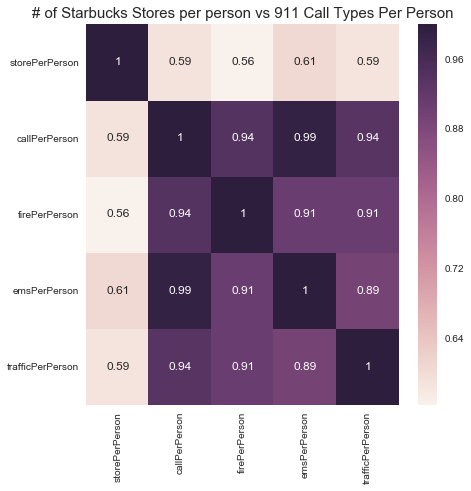

In [16]:
fig = plt.figure(figsize=(7,7))
plt.title(title, size=15)
sns.heatmap(rhoDF,annot=True, annot_kws={"size":12});
plt.yticks(rotation="horizontal");
plt.xticks(rotation="vertical");

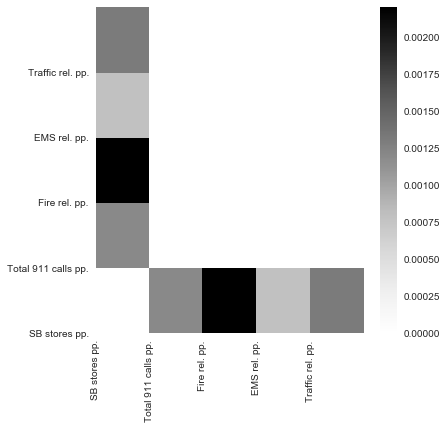

In [17]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
labels=["SB stores pp.","Total 911 calls pp.","Fire rel. pp.","EMS rel. pp.","Traffic rel. pp.",]
ax1.set(xticks=np.arange(len(labels)), xticklabels=labels)
ax1.set(yticks=np.arange(len(labels)), yticklabels=labels)
plt.xticks(rotation="vertical")
plt.pcolor(p_value)
plt.colorbar();

We have very small p-values for this correlation matrix, the correlation values change in terms of <b>0.1</b> scale meanwhile the maximum p-value is in <b>0.0001</b> scale. That's what we were looking for. This makes our observations statistically significant and we verify that there exists a strong monotonic relationship between the number of Starbucks stores per person & 911 calls.<br />
<h5>2. Kendall's Tau</h5>

In [18]:
tauDF = df.corr(method="kendall")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

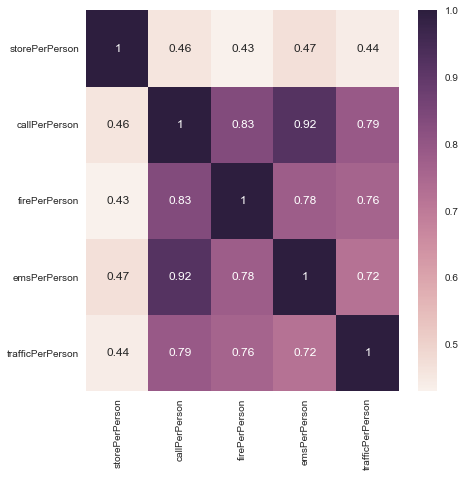

In [19]:
fig = plt.figure(figsize=(7,7))
sns.heatmap(tauDF,annot=True, annot_kws={"size":12});
plt.yticks(rotation="horizontal")
plt.xticks(rotation="vertical")

Kendall's Tau makes pairwise calculations only. Our hypothesis involves general 911 calls, thus we shall see how the
<ul>
    <li>Number of Starbucks stores per person</li>
    <li>Number of any 911 calls per person</li>
</ul>
correlates
<br />
<br />
As mentioned earlier, the total number of 911 calls and the categorical 911 calls are dependent so inspecting only the total 911 calls is sufficient.

In [20]:
tau, p_value = sp.kendalltau(df.storePerPerson, df.callPerPerson)

In [21]:
p_value

0.00078977860545350687

Yet another very small p-value

<h3>Statistical Conclusion</h3><br />
The p-value for this test is also in <b>0.0001</b> scale. All the correlation tests we have performed has resulted in very small p-values and relatively large (from 0.33 to 0.64) correlation values. We have very strong evidence to <b>accept our null hypothesis</b> to say that
<ul>
    <li>Number of Starbucks stores per person</li>
    <li>Number of any 911 calls per person</li>
</ul>
have a strong, positively monotonic relation. Our number-crunching has also yielded that the most likely 911 call originating from an area with more Starbucks stores has a traffic-related issue.<br />
<h5>What can we tell?</h5>
<ul>
<li>
There are many possibilities why we are seeing these as we can never be sure what is <b>causing</b> what but it's a nice thing to have the most frequent 911 call to be traffic-related, since that's the most unharmful of all. 
</li>
<li>
The total number of 911 calls increase as the number of starbucks stores increases; this may mean that either there is actually more crime occuring in the area, or people are more sensitive/responsive and more people call 911 for a given crime (more people as in more people per population, we have normalized our data)
</li>
</ul>
<br />
Located below, is a good visual on the data (a linear regression plot)

In [22]:
def scatterTwoSeries(series1, series2, dataframe):
    fig = plt.figure(figsize=(7,7))
    X = series1#.values
    Y = series2#.values
    ax = sns.regplot(x=X, y=Y, label="Towns", data=dataframe)
    for i, ctr in enumerate(pickleData.Town):
        ax.annotate(ctr, (X[i],Y[i]),size=10)

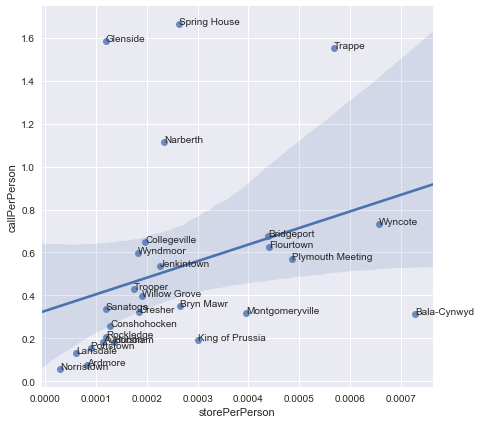

In [23]:
scatterTwoSeries(df.storePerPerson, df.callPerPerson, df)

<h2>ML - Polynomial Regression</h2>

<b>Important:</b> We have numerical data in our hand, not categorical data; hence we are not able to use classifiers. We will train regressor models.

<h5>Part 1 - Fitting The Models</h5>

As can be seen from the linear regression plot above, Glenside and Spring House towns are a significant outliers that will affect the models we will be fitting in a bad way. Since we don't have hundreds of rows in our data frame it will have a significant impact. We shall eliminate these anomalies.
<br /><br />
<b>Note:</b> We tried to use the data as is but having the outliers increased the RMSE of the models by about 30%

In [54]:
# find the outliers
indexes = pickleData[(pickleData.Town == "Glenside") | (pickleData.Town == "Spring House")].index
df = df.drop(indexes[0])
df = df.drop(indexes[1])

In [56]:
df[df.callPerPerson > 1.4]

,storePerPerson,callPerPerson,firePerPerson,emsPerPerson,trafficPerPerson
12,0.000569,1.549772,0.247156,1.05802,0.244596


There is only one township having more than 1.4 call per person. It has a value of 1.54 call per person, it should be Trappe. 

Now, we will train and test some machine learning models. We will split our data into two parts. In total, we have 25 rows in our dataframe. We shall split the data fo training and testing. We shall use 2/3 of our data to train our models and use the remaining 1/3 to test them

In [57]:
trainX = df.storePerPerson[:17].values # partition the data into training and testing
trainY = df.callPerPerson[:17].values
testX = df.storePerPerson[17:].values
testY = df.callPerPerson[17:].values

allX = df.storePerPerson.values
allY = df.callPerPerson.values

In [58]:
# Root Mean Square Error will be used to determine the success of the model
def RMSE(model, x_axis, y_axis): 
    return sqrt(sklearn.metrics.mean_squared_error(y_true=y_axis, y_pred=model(x_axis)))

In [60]:
# Create the linear model and train it
linReg = linear_model.LinearRegression()
fitX = trainX.resize(17,1)
fitY = trainY.resize(17,1)
linReg.fit(trainX, trainY);

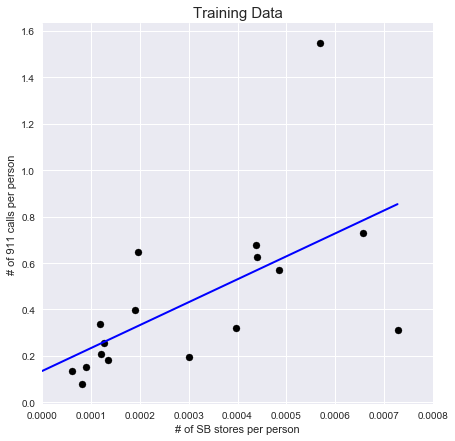

The model has a root mean square error of 0.275539659878246


In [63]:
# Plot the linear model
xPlot = np.linspace(0, max(trainX), 100)
plt.figure(figsize=(7,7))
plt.scatter(trainX, trainY,  color='black')
regressionLine = [linReg.predict(x)[0][0] for x in xPlot]
plt.plot(xPlot, regressionLine, color='blue', linewidth=2)
plt.xlabel('# of SB stores per person')
plt.ylabel('# of 911 calls per person')
plt.title('Training Data', size=15)
axes = plt.gca()
axes.set_xlim([0, 0.0008])
plt.show()
print("The model has a root mean square error of", RMSE(linReg.predict, trainX, trainY))

This is the training data, let's see how the regression line stands with the whole data

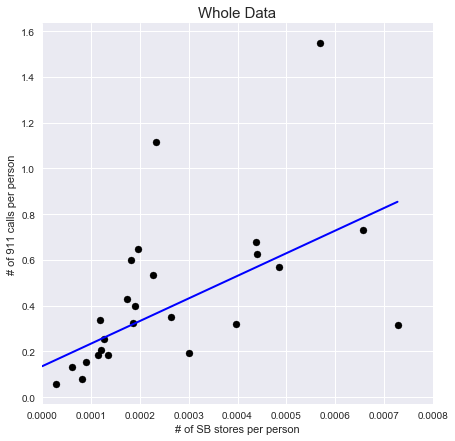

In [64]:
plt.figure(figsize=(7,7))
plt.scatter(df.storePerPerson, df.callPerPerson, color='black')
plt.plot(xPlot, regressionLine, color='blue', lw=2)
plt.xlabel('# of SB stores per person')
plt.ylabel('# of 911 calls per person')
plt.title('Whole Data', size=15)
axes = plt.gca()
axes.set_xlim([0, 0.0008])
plt.show()

In [65]:
predictions = [linReg.predict(x)[0][0] for x in allX]
RMSE_linearFinal = sqrt(sklearn.metrics.mean_squared_error(allY, predictions))
print("The model has a root mean square of", RMSE_linearFinal)

The model has a root mean square of 0.2824504797607267


It seems like for the whole data, the RMSE is lower. Now, let's see how higher degree polynomials fit the data

RMSE of degree 2 : 0.261010353925637
RMSE of degree 3 : 0.24172104086570945
RMSE of degree 4 : 0.17518834272681613
RMSE of degree 5 : 0.17515332303245662


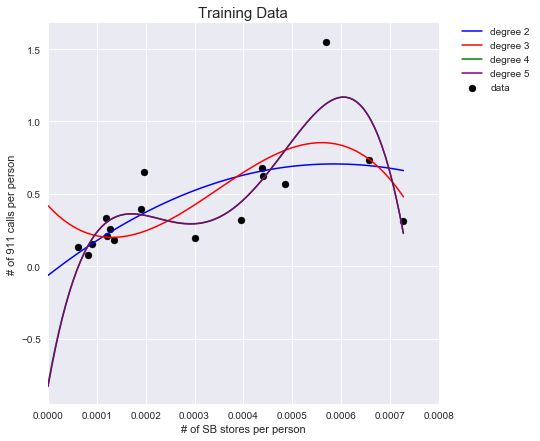

In [71]:
def polynomialRegressionInfo(x_data, y_data, title=""):
    colors = ['blue', 'red', 'green', 'purple']
    degrees = [2,3,4,5]
    plt.figure(figsize=(7,7))
    plt.scatter(x_data, y_data, c="black", label="data")
    for i in range(len(degrees)):
        coefficients = np.polyfit(df.storePerPerson[:18].values, df.callPerPerson[:18].values, degrees[i])
        xPlot = np.linspace(0, max(x_data), 100)
        polynomial = np.poly1d(coefficients)
        plt.plot(xPlot, polynomial(xPlot), colors[i], label="degree %d" % (degrees[i]), linewidth=1.5)
        print("RMSE of degree", degrees[i], ":", RMSE(polynomial, x_data, y_data))
    plt.xlabel('# of SB stores per person')
    plt.ylabel('# of 911 calls per person')
    plt.title(title, size=15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    axes = plt.gca()
    axes.set_xlim([0, 0.0008])
    plt.show()
polynomialRegressionInfo(trainX, trainY, "Training Data")

RMSE of degree 2 : 0.26362321579833997
RMSE of degree 3 : 0.2826724069502902
RMSE of degree 4 : 0.23903413416949817
RMSE of degree 5 : 0.239812572945713


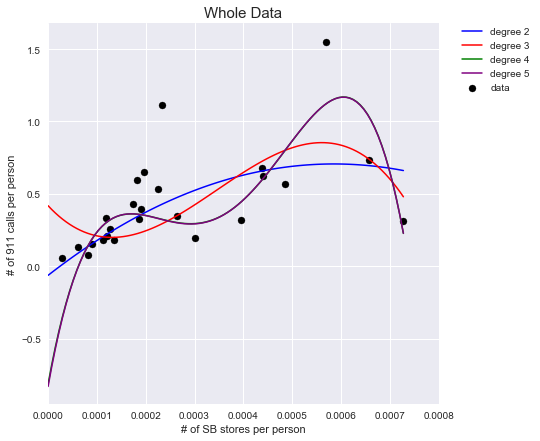

In [72]:
polynomialRegressionInfo(allX, allY, "Whole Data")

<h5>Part 2 - Testing The Models</h5>
<ul><li>Linear Regression</li></ul>

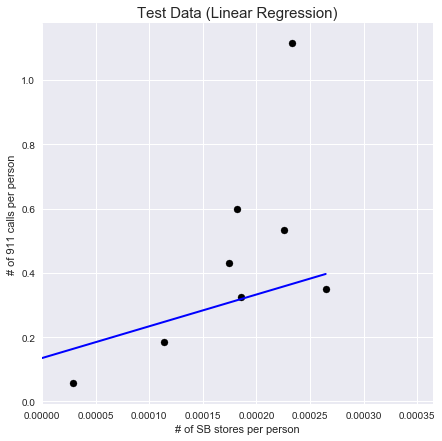

The model has a root mean square of 0.2966018094827822


In [73]:
# Plot the regression line for the testing data
plt.figure(figsize=(7,7))
xPlot = np.linspace(0, max(testX), 100)
plt.scatter(testX, testY,  color='black')
regressionLine = [linReg.predict(x)[0][0] for x in xPlot]
plt.plot(xPlot, regressionLine, color='blue', linewidth=2)
plt.xlabel('# of SB stores per person')
plt.ylabel('# of 911 calls per person')
plt.title('Test Data (Linear Regression)', size=15)
axes = plt.gca()
axes.set_xlim([0, max(testX) + 0.0001])
plt.show()

# obtain the error of the model
predictions = [linReg.predict(x)[0][0] for x in testX]
RMSE_test = sqrt(sklearn.metrics.mean_squared_error(testY, predictions))
print("The model has a root mean square of", RMSE_test)

<ul><li>Polynomial Regression</li></ul>

RMSE of degree 2 : 0.26909132165909
RMSE of degree 3 : 0.3543123964322177
RMSE of degree 4 : 0.3366538820117739
RMSE of degree 5 : 0.3384180258742077


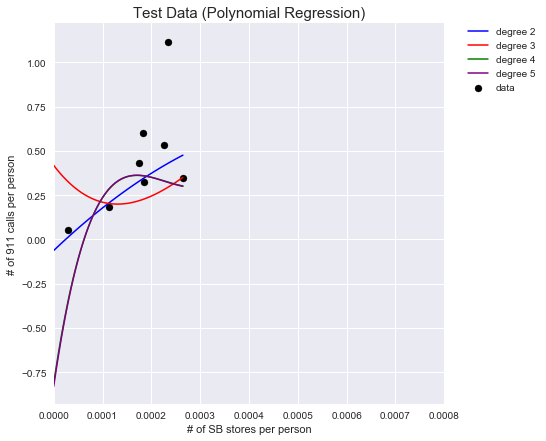

In [74]:
polynomialRegressionInfo(testX, testY, "Test Data (Polynomial Regression)")

<h2>ML - Decision Tree</h2>

As mentioned earlier, we don't have a categorical data, instead we have a continuous data. Hence, we cannot use classifiers. We will be using regressors for this reason.

In [75]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


def getDecisionTreeInfo(x_data, y_data, title=""):
    # Fit regression model
    regr_1 = DecisionTreeRegressor(max_depth=2)
    regr_2 = DecisionTreeRegressor(max_depth=5)
    regr_1.fit(trainX, trainY)
    regr_2.fit(trainX, trainY)

    # Predict
    X_test = np.arange(0.0, max(x_data), 0.000001)[:, np.newaxis]
    y_1 = regr_1.predict(X_test)
    y_2 = regr_2.predict(X_test)

    # Plot the results
    plt.figure(figsize=(7,7))
    plt.scatter(x_data, y_data, c="red", label="data")
    plt.plot(X_test, y_1, color="green", label="max_depth=2", linewidth=2)
    plt.plot(X_test, y_2, color="blue", label="max_depth5", linewidth=2)
    plt.xlabel("# of SB stores per people")
    plt.ylabel("# of 911 calls per person")
    plt.title(title, size=15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    axes = plt.gca()
    axes.set_xlim([0, max(x_data) + 0.0001])
    plt.show()
    print("RMSE of DT with depth 2:", RMSE(regr_1.predict, x_data, y_data))
    print("RMSE of DT with depth 5:", RMSE(regr_2.predict, x_data, y_data))

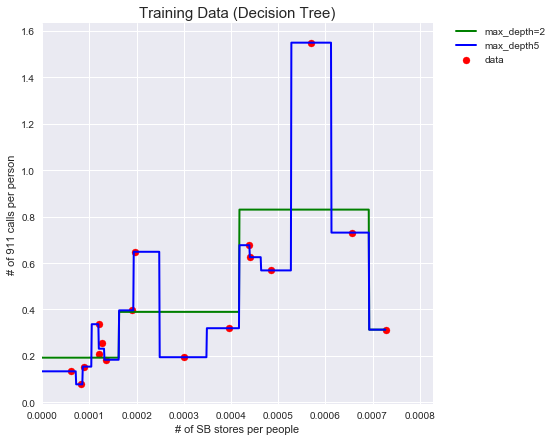

RMSE of DT with depth 2: 0.21894708854395714
RMSE of DT with depth 5: 0.008476417242632832


In [76]:
getDecisionTreeInfo(trainX, trainY, "Training Data (Decision Tree)")

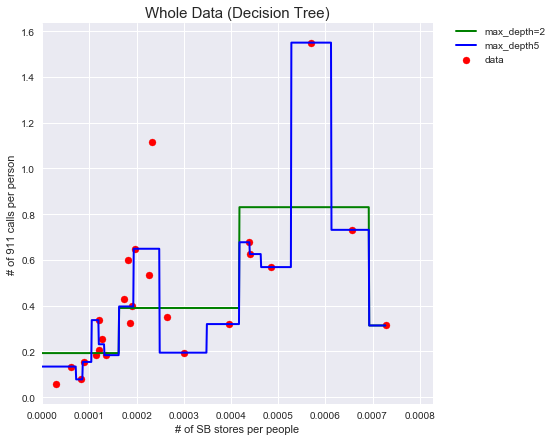

RMSE of DT with depth 2: 0.23914593425346217
RMSE of DT with depth 5: 0.11497694162687717


In [78]:
getDecisionTreeInfo(allX.reshape(25,1), allY.reshape(25,1), "Whole Data (Decision Tree)")

<h3>Testing Decision Trees on Test Data</h3>

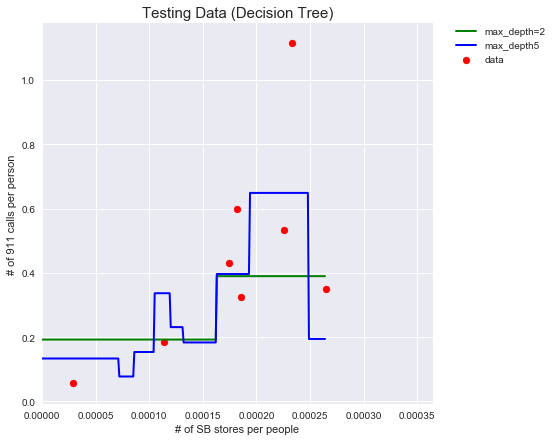

RMSE of DT with depth 2: 0.2772242724440695
RMSE of DT with depth 5: 0.20287649679335318


In [79]:
getDecisionTreeInfo(testX.reshape(8,1), testY.reshape(8,1), "Testing Data (Decision Tree)")

<center>
<h1>Conclusion</h1><br />
We have tested various models to train and test the data. Located below, is a comparison of the root mean square errors of these models under specified data
<b>BELOW TABLE CURRENTLY CONTAINS FALSE NUMBERS AS THERE ARE MINOR CHANGES IN THE ANALYSIS ABOVE</b>
<table>
<thead>
<tr>
    <th>Model</th>
    <th>Training Data</th>
    <th>Whole Data</th>
    <th>Testing Data</th>
</tr>
</thead>
<tbody>
    <tr>
        <td>Linear Regression</td>
        <td>0.384</td>
        <td>0.330</td>
        <td>0.146</td>
    </tr>
    <tr>
        <td>2nd Deg. Poly. Reg.</td>
        <td>0.376</td>
        <td>0.306</td>
        <td>0.213</td>
    </tr>
    <tr>
        <td>3rd Deg. Poly. Reg.</td>
        <td>0.373</td>
        <td>0.302</td>
        <td>0.213</td>
    </tr>
    <tr>
        <td>4th Deg. Poly. Reg.</td>
        <td>0.318</td>
        <td>0.359</td>
        <td>0.480</td>
    </tr>
    <tr>
        <td>5th Deg. Poly. Reg.</td>
        <td>0.325</td>
        <td>0.289</td>
        <td>0.660</td>
    </tr>
    <tr>
        <td>Depth 2 D. Tree</td>
        <td>0.294</td>
        <td>0.252</td>
        <td>0.108</td>
    </tr>
        <tr>
        <td>Depth 5 D. Tree</td>
        <td>0.094</td>
        <td>0.110</td>
        <td>0.139</td>
    </tr>
</tbody>
</table>
</center>

<h2>Analysis</h2>
Almost every model here have performed better on the test data rather in comparison to the training data. This is unexpected, but possible since outliers exist in the training data. We wish that we had more data to be able to build better models but in the end our models have performed with about 15% error in average (ignoring 4th and 5th degree polynomials), thus in the end our models aren't performing bad at all.<br /><br />


We've already inspected the scene with a statistical vision earlier, which has shown us that there is a strong positive correlation between the data. Now, we have experimentally seen this by having various models to predict the number of 911 calls per person, given the number of Starbucks stores per person. The best model among the ones we've analysed seems to be the decision tree with max depth of 2 since it has the best testing data result. The decision tree with max depth 5 seems to be overfit since it has fitted to the training data very well but performed slightly worse than its rival decision tree.

We don't know whether the number of Starbucks stores correlate with the number of crimes, or instead the responsiveness of people living in these areas but that's what we wanted to show. Overall, this is an interesting finding and we are happy with the results